# Notebook to evaluate the CellPainting protocol 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import string
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap, BoundaryNorm, Normalize
from matplotlib.colors import to_hex

In [3]:
df_level4b = pd.read_csv("../02_processed_data/df_level4b.csv")

In [4]:
# Ensure 'Metadata_Well' is a string
df_level4b["Metadata_Well"] = df_level4b["Metadata_Well"].astype(str)

# Extract row (letter(s)) and column (numbers))
df_level4b["Metadata_row"] = df_level4b["Metadata_Well"].str.extract(r"^([A-Z]+)")
df_level4b["Metadata_col"] = df_level4b["Metadata_Well"].str.extract(r"(\d+)$").astype(int)

# Convert row letters (A→1, B→2, etc.)
row_map = {letter: idx for idx, letter in enumerate(string.ascii_uppercase, start=1)}
df_level4b["Metadata_row"] = df_level4b["Metadata_row"].map(row_map)

# Evaluate replicats

In [7]:
# Replicates per plates 
plates = df_level4b["Metadata_Plate"].unique()
for _plate in plates:
    n_chem_rep_plate = sum(df_level4b[df_level4b["Metadata_Plate"] == _plate][["Metadata_JCP2022"]].value_counts().to_frame()['count'] > 1)
    n_chem_no_rep_plate = sum(df_level4b[df_level4b["Metadata_Plate"] == _plate][["Metadata_JCP2022"]].value_counts().to_frame()['count'] == 1)
    print("In plate ", _plate,", there are :", n_chem_rep_plate, "chemicals that have replicates")
    print("In plate ", _plate,", there are :", n_chem_no_rep_plate, "chemicals that don't have replicates")

In plate  BR00127145 , there are : 20 chemicals that have replicates
In plate  BR00127145 , there are : 282 chemicals that don't have replicates
In plate  BR00127146 , there are : 20 chemicals that have replicates
In plate  BR00127146 , there are : 282 chemicals that don't have replicates
In plate  BR00127147 , there are : 19 chemicals that have replicates
In plate  BR00127147 , there are : 282 chemicals that don't have replicates
In plate  BR00127148 , there are : 20 chemicals that have replicates
In plate  BR00127148 , there are : 282 chemicals that don't have replicates
In plate  BR00127149 , there are : 20 chemicals that have replicates
In plate  BR00127149 , there are : 282 chemicals that don't have replicates


In [8]:
# Replicates per plate per chemical
plates = df_level4b["Metadata_Plate"].unique()
chemicals = df_level4b["Metadata_JCP2022"].unique()
for _plate in plates:
    for _chemical in chemicals:
        n_chem_rep = df_level4b[
            (df_level4b["Metadata_Plate"] == _plate) &
            (df_level4b["Metadata_JCP2022"] == _chemical)
        ]
        print(f"Plate: {_plate}, Chemical: {_chemical}, Replicates: {len(n_chem_rep)}")

Plate: BR00127145, Chemical: JCP2022_043547, Replicates: 1
Plate: BR00127145, Chemical: JCP2022_050797, Replicates: 2
Plate: BR00127145, Chemical: JCP2022_050997, Replicates: 1
Plate: BR00127145, Chemical: JCP2022_108326, Replicates: 1
Plate: BR00127145, Chemical: JCP2022_033924, Replicates: 64
Plate: BR00127145, Chemical: JCP2022_027911, Replicates: 1
Plate: BR00127145, Chemical: JCP2022_100264, Replicates: 1
Plate: BR00127145, Chemical: JCP2022_050861, Replicates: 1
Plate: BR00127145, Chemical: JCP2022_014367, Replicates: 1
Plate: BR00127145, Chemical: JCP2022_071429, Replicates: 1
Plate: BR00127145, Chemical: JCP2022_016288, Replicates: 1
Plate: BR00127145, Chemical: JCP2022_091373, Replicates: 2
Plate: BR00127145, Chemical: JCP2022_004940, Replicates: 1
Plate: BR00127145, Chemical: JCP2022_103217, Replicates: 1
Plate: BR00127145, Chemical: JCP2022_079562, Replicates: 1
Plate: BR00127145, Chemical: JCP2022_020163, Replicates: 1
Plate: BR00127145, Chemical: JCP2022_099471, Replicates

In [9]:
for _plate in plates:
    n_dmso = sum(df_level4b[df_level4b["Metadata_Plate"] == _plate]["Metadata_Name"] == "DMSO")
    print("In plate ", _plate,", there are :", n_dmso, "DMSO out of 384 wells")

In plate  BR00127145 , there are : 64 DMSO out of 384 wells
In plate  BR00127146 , there are : 64 DMSO out of 384 wells
In plate  BR00127147 , there are : 64 DMSO out of 384 wells
In plate  BR00127148 , there are : 64 DMSO out of 384 wells
In plate  BR00127149 , there are : 64 DMSO out of 384 wells


In [10]:
chemicals = df_level4b["Metadata_JCP2022"].unique()
for _chemical in chemicals:
    n_chem = len(df_level4b[df_level4b["Metadata_JCP2022"] == _chemical])
    print("For chemical ", _chemical,", there are :", n_chem, "replicates accross the different plates")

For chemical  JCP2022_043547 , there are : 5 replicates accross the different plates
For chemical  JCP2022_050797 , there are : 10 replicates accross the different plates
For chemical  JCP2022_050997 , there are : 5 replicates accross the different plates
For chemical  JCP2022_108326 , there are : 5 replicates accross the different plates
For chemical  JCP2022_033924 , there are : 320 replicates accross the different plates
For chemical  JCP2022_027911 , there are : 5 replicates accross the different plates
For chemical  JCP2022_100264 , there are : 5 replicates accross the different plates
For chemical  JCP2022_050861 , there are : 5 replicates accross the different plates
For chemical  JCP2022_014367 , there are : 5 replicates accross the different plates
For chemical  JCP2022_071429 , there are : 5 replicates accross the different plates
For chemical  JCP2022_016288 , there are : 5 replicates accross the different plates
For chemical  JCP2022_091373 , there are : 10 replicates accro

# Analysis experiments

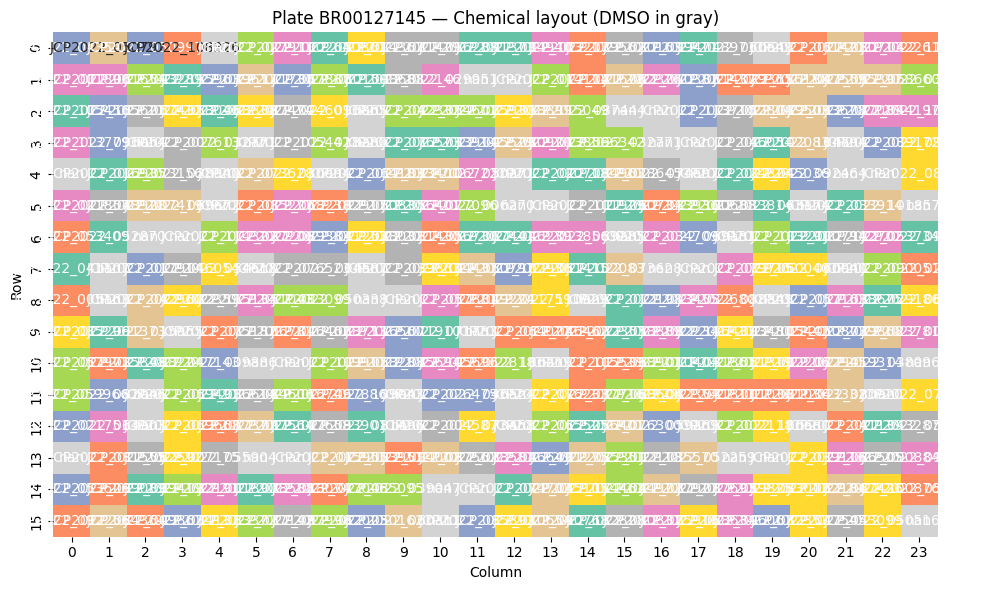

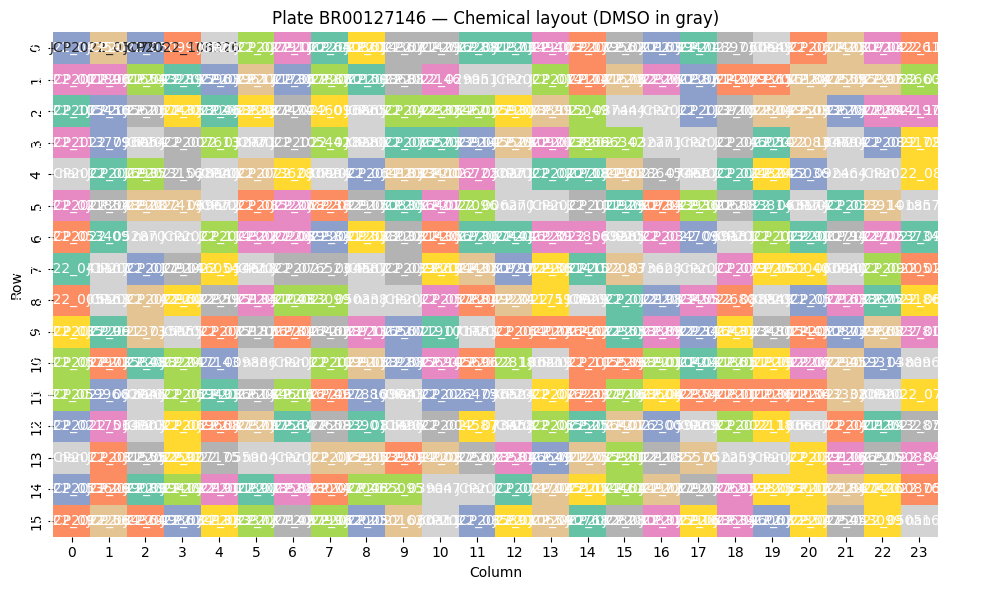

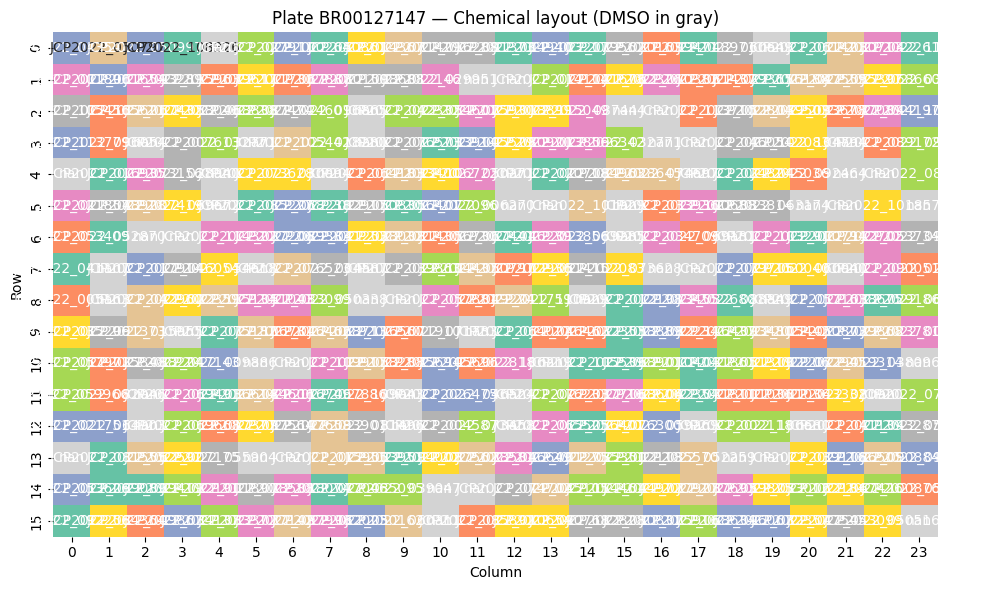

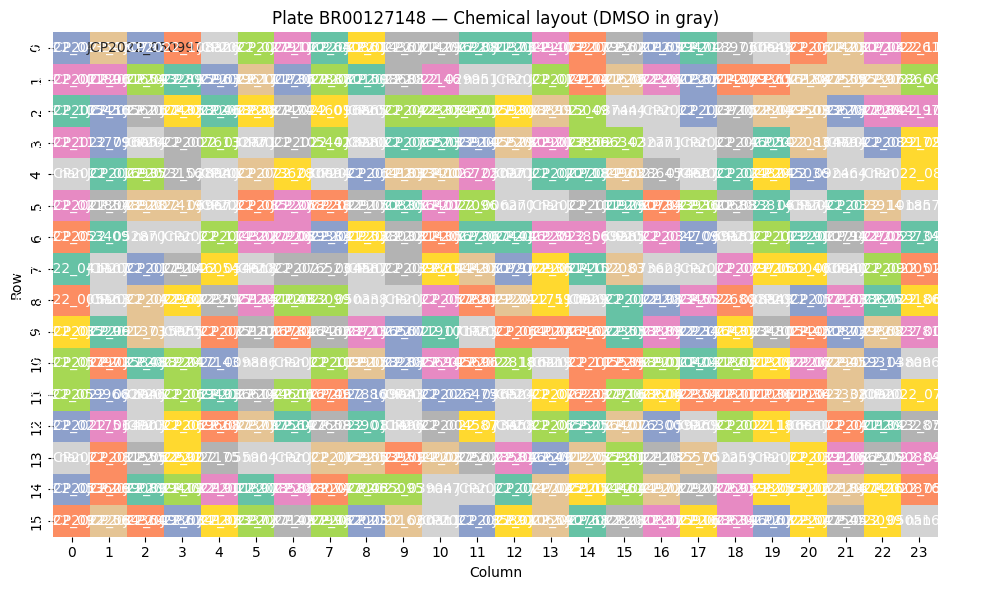

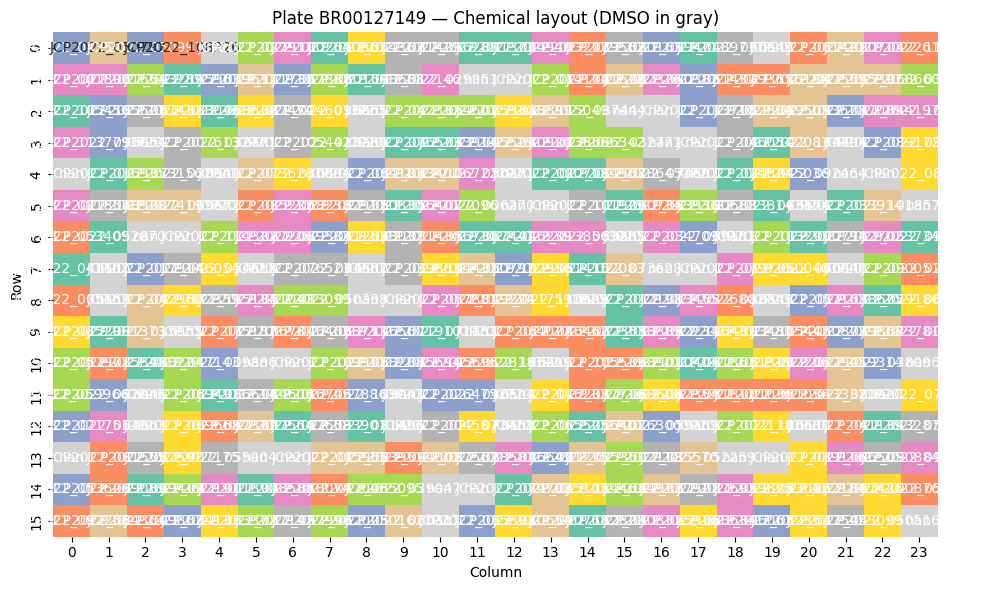

In [6]:
for _plate, df_plate in df_level4b.groupby("Metadata_Plate"):
    df_plate = df_plate.copy()
    df_plate["is_DMSO"] = df_plate["Metadata_Name"].eq("DMSO")

    # Create column for plotting: chemical name or NaN for DMSO
    df_plate["chem_for_plot"] = np.where(
        df_plate["is_DMSO"], np.nan, df_plate["Metadata_JCP2022"]
    )

    # Unique non-DMSO chemicals
    unique_chems = sorted(df_plate.loc[~df_plate["is_DMSO"], "Metadata_JCP2022"].unique())
    n_chems = len(unique_chems)

    # Pivot for plate layout
    plate_map = (
        df_plate.pivot(index="Metadata_row", columns="Metadata_col", values="chem_for_plot")
        .sort_index()
        .sort_index(axis=1)
    )

    # --- Colormap setup ---
    _cmap = ListedColormap(sns.color_palette("Set2", n_colors=n_chems))

    plt.figure(figsize=(10, 6))

    # --- Draw base map: color by chemical ---
    _color_dict = dict(zip(unique_chems, _cmap.colors))
    _color_dict = {chem: to_hex(color) for chem, color in _color_dict.items()}
    color_grid = plate_map.replace(_color_dict)

    # Replace NaN (DMSO) with gray color
    color_grid = color_grid.fillna("lightgray")

    # --- Plot ---
    _ax = sns.heatmap(
        np.empty_like(color_grid, dtype=float),  # placeholder grid
        annot=plate_map,                        # show chemical names (optional)
        fmt="",
        cbar=False,
        linewidths=0.5,
        linecolor="gray",
    )

    for (r, c), value in np.ndenumerate(plate_map.values):
        color = "lightgray" if pd.isna(value) else _color_dict[value]
        _ax.add_patch(plt.Rectangle((c, r), 1, 1, fill=True, color=color, lw=0))

    # --- Custom legend ---
    #legend_elements = [
    #    Patch(facecolor=color, label=chem) for chem, color in _color_dict.items()
    #]
    #legend_elements.append(Patch(facecolor="lightgray", label="DMSO"))

    #plt.legend(
    #    handles=legend_elements,
    #    title="Chemicals",
    #    bbox_to_anchor=(1.05, 1),
    #    loc="upper left",
    #    borderaxespad=0.,
    #)


    # --- Aesthetic details ---
    plt.title(f"Plate {_plate} — Chemical layout (DMSO in gray)")
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.tight_layout()
    plt.show()


In [ ]:
df_plate["Metadata_JCP2022"].nunique()

302

In [ ]:
len(df_plate["Metadata_Well"].unique())

384

In [ ]:
df_plate["Metadata_Well"]

0       A01
1       A02
2       A03
3       A04
4       A05
       ... 
8051    P20
8052    P21
8053    P22
8054    P23
8055    P24
Name: Metadata_Well, Length: 1920, dtype: object

In [ ]:
df_plate.pivot(index="Metadata_row", columns="Metadata_col", values="chem_for_plot")

Metadata_col,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
Metadata_row,,,,,,,,,,,,,,,,,,,,,
1,JCP2022_043547,JCP2022_050797,JCP2022_050997,JCP2022_108326,NaN,JCP2022_027911,JCP2022_100264,JCP2022_050861,JCP2022_014367,JCP2022_071429,...,JCP2022_079562,JCP2022_020163,JCP2022_099471,JCP2022_048971,JCP2022_060649,NaN,JCP2022_061421,JCP2022_030713,JCP2022_042261,JCP2022_113600
2,JCP2022_001890,JCP2022_061654,JCP2022_093289,JCP2022_115963,JCP2022_079617,JCP2022_111730,JCP2022_067887,JCP2022_080150,JCP2022_098688,JCP2022_012146,...,JCP2022_021678,JCP2022_062326,JCP2022_010382,JCP2022_061437,JCP2022_029365,JCP2022_116188,JCP2022_047559,JCP2022_055397,JCP2022_068660,JCP2022_030049
3,JCP2022_105456,JCP2022_105621,JCP2022_067432,JCP2022_058046,JCP2022_068838,JCP2022_087474,JCP2022_024601,JCP2022_096865,NaN,JCP2022_042332,...,JCP2022_087444,NaN,NaN,JCP2022_113710,JCP2022_052804,JCP2022_039503,JCP2022_093678,JCP2022_077089,JCP2022_044197,JCP2022_109350
4,JCP2022_113779,JCP2022_096054,NaN,JCP2022_007613,JCP2022_032771,NaN,JCP2022_105442,JCP2022_018280,NaN,JCP2022_076573,...,JCP2022_096342,JCP2022_032771,NaN,NaN,JCP2022_046054,JCP2022_102083,JCP2022_104794,NaN,JCP2022_089172,JCP2022_090205
5,NaN,JCP2022_016935,JCP2022_073156,JCP2022_028940,NaN,JCP2022_073628,JCP2022_030094,NaN,JCP2022_064183,JCP2022_033400,...,JCP2022_084963,JCP2022_028645,JCP2022_074697,NaN,JCP2022_024824,JCP2022_045036,JCP2022_092464,NaN,NaN,JCP2022_080224
6,JCP2022_021857,JCP2022_048928,JCP2022_007419,JCP2022_069672,NaN,JCP2022_085227,JCP2022_068238,JCP2022_102917,JCP2022_050830,JCP2022_056401,...,JCP2022_101929,JCP2022_060734,JCP2022_033936,JCP2022_100688,JCP2022_033814,JCP2022_063174,NaN,JCP2022_033914,JCP2022_101857,NaN
7,JCP2022_053409,JCP2022_052870,NaN,NaN,JCP2022_114322,JCP2022_027206,JCP2022_089383,JCP2022_041253,JCP2022_028032,JCP2022_081430,...,JCP2022_069285,NaN,JCP2022_034709,JCP2022_069131,NaN,JCP2022_103291,JCP2022_000794,JCP2022_112702,JCP2022_053734,JCP2022_093956
8,JCP2022_041107,NaN,JCP2022_017914,JCP2022_046054,JCP2022_054618,NaN,JCP2022_076523,JCP2022_004587,NaN,JCP2022_039863,...,JCP2022_102083,JCP2022_073628,NaN,NaN,JCP2022_079715,JCP2022_060040,JCP2022_060040,NaN,JCP2022_090051,JCP2022_025848
9,JCP2022_005163,NaN,JCP2022_042960,JCP2022_022359,JCP2022_115134,JCP2022_051043,JCP2022_083099,JCP2022_050338,NaN,NaN,...,NaN,JCP2022_012198,JCP2022_013455,JCP2022_032680,JCP2022_088849,NaN,JCP2022_057163,JCP2022_038675,JCP2022_029186,JCP2022_066287


# Analysis GRiT

# Analysis mAP